In [1]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Our focus will be on the exchange rate between the euro and the American dollar. 

In [8]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [9]:
cols = ['US_dollar', 'Time']
euro_to_dollar = []
euro_to_dollar = exchange_rates[cols]

In [10]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.2486     1
0.9775     1
0.9493     1
1.1827     1
0.9576     1
Name: US_dollar, Length: 3528, dtype: int64

In [16]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

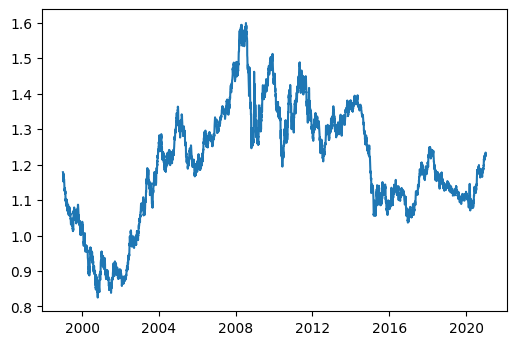

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

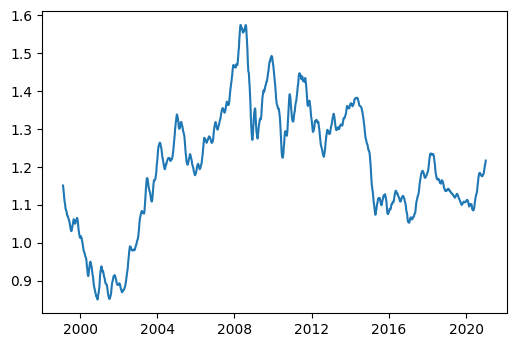

In [21]:
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean_30'])

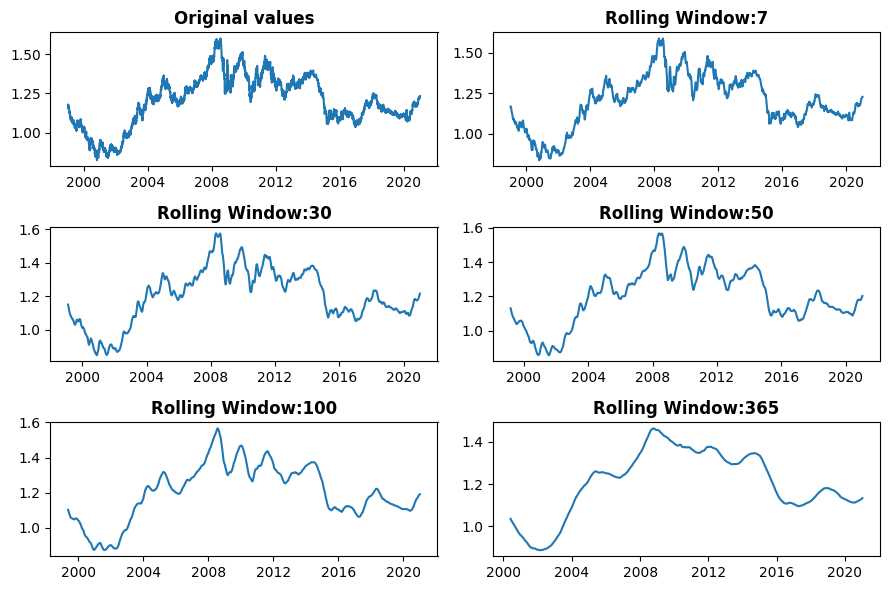

In [22]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [36]:
corona_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year > 2019)]                                

pre_covid = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year > 2015
                   ) & (euro_to_dollar['Time'].dt.year < 2020)] 
                                          
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]   

financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2007
                   ) & (euro_to_dollar['Time'].dt.year <= 2008)]     

George_W_Bush = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001
                   ) & (euro_to_dollar['Time'].dt.year < 2009)] 
                                          
Barack_Obama = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2009
                   ) & (euro_to_dollar['Time'].dt.year < 2017)]
                                          
Donald_Trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2017
                   ) & (euro_to_dollar['Time'].dt.year < 2021)]     

1. We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

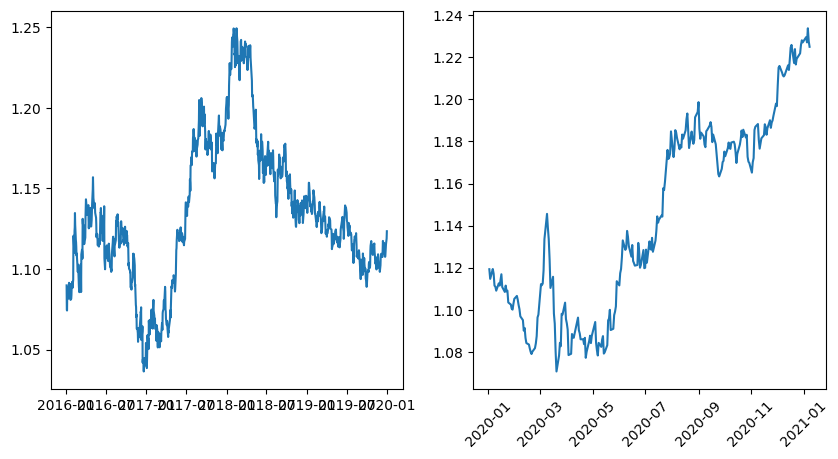

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax1.plot(pre_covid['Time'], pre_covid['US_dollar'])
plt.xticks(rotation=45)
ax2.plot(corona_crisis['Time'], corona_crisis['US_dollar'])
plt.xticks(rotation=45)
plt.show()

2. We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

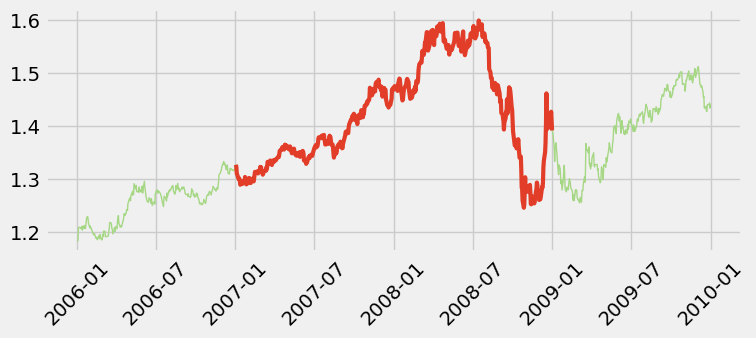

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline 

style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(8,3))

ax.plot(financial_crisis['Time'], financial_crisis['US_dollar'], linewidth=1, color='#A6D785')
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['US_dollar'], linewidth=3, color='#e23d28')


plt.xticks(rotation=45)

plt.show()

3. We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

No handles with labels found to put in legend.


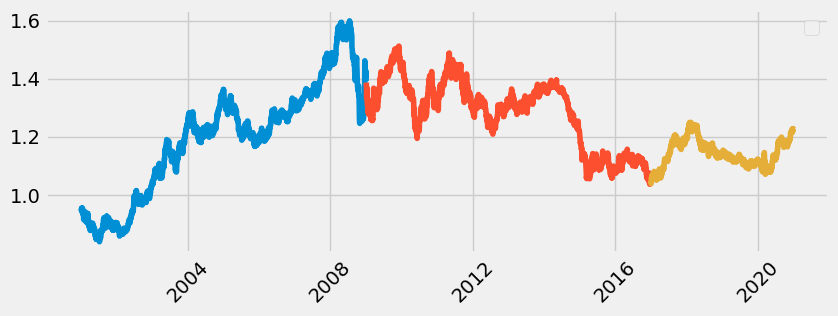

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline 

style.use('fivethirtyeight')

fig, (ax) = plt.subplots(figsize=(9,3))

ax.plot(George_W_Bush['Time'], George_W_Bush['US_dollar'])
ax.plot(Barack_Obama['Time'], Barack_Obama['US_dollar'])
ax.plot(Donald_Trump['Time'], Donald_Trump['US_dollar'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [64]:
ax1.get_xticks()

array([730120., 730486., 730851., 731216., 731581., 731947., 732312.,
       732677., 733042., 733408.])